In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [131]:
with_nudges_log_file = open("logs/loopy_2023_08_13_23_52_42/final_rechecked.json", "r", encoding="utf-8")
with_nudges_log = json.load(with_nudges_log_file)
with_nudges_log_file.close()
with_nudges_log = with_nudges_log["logs"]

without_nudges_log_file = open("logs/loopy_2023_08_13_23_52_36/final_rechecked.json", "r", encoding="utf-8")
without_nudges_log = json.load(without_nudges_log_file)
without_nudges_log_file.close()
without_nudges_log = without_nudges_log["logs"]

without_nudges_repair_file = open("logs/repair_loopy_2023_08_15_16_04_35/final.json", "r", encoding="utf-8")
without_nudges_repair_log = json.load(without_nudges_repair_file)
without_nudges_repair_file.close()
without_nudges_repair_log = without_nudges_repair_log["logs"]

with_nudges_repair_file = open("logs/repair_loopy_2023_08_15_16_14_47/final.json", "r", encoding="utf-8")
with_nudges_repair_log = json.load(with_nudges_repair_file)
with_nudges_repair_file.close()
with_nudges_repair_log = with_nudges_repair_log["logs"]

In [224]:
with_nudges = {
    "pass_k" : { 0: [], 1: [], 2: [], 3: [], 4: [], 5: [] },
    "pass_k_with_prune" : { 0: [], 1: [], 2: [], 3: [], 4: [], 5: [] },
    "conjunct_without_pruning" : { "success" : [], "failure" : []},
    "conjunct_with_pruning" : { "success" : [], "failure" : []},
    "success_before_healing": [],
    "healing_without_pruning" : { 1: [], 2: [], 3: [], 4: [], 5: [], "failure" : []},
    "healing_with_pruning" : { "success" : [], "failure" : []},
    "final_success": [],
    "final_failure": [],
    "healing2_without_pruning" : { 1: [], 2: [], 3: [], 4: [], 5: [], "failure" : []},
    "healing2_with_pruning" : { "success" : [], "failure" : []},
}

without_nudges = {
    "pass_k" : { 0: [], 1: [], 2: [], 3: [], 4: [], 5: [] },
    "pass_k_with_prune" : { 0: [], 1: [], 2: [], 3: [], 4: [], 5: [] },
    "conjunct_without_pruning" : { "success" : [], "failure" : []},
    "conjunct_with_pruning" : { "success" : [], "failure" : []},
    "success_before_healing": [],
    "failure_before_healing": [],
    "healing_without_pruning" : { 1: [], 2: [], 3: [], 4: [], 5: [], "failure" : []},
    "healing_with_pruning" : { "success" : [], "failure" : []},
    "final_success": [],
    "final_failure": [],
    "healing2_without_pruning" : { 1: [], 2: [], 3: [], 4: [], 5: [],  "failure" : []},
    "healing2_with_pruning" : { "success" : [], "failure" : []},
}

In [181]:
len(set(with_nudges["final_success"]))

252

In [225]:
for b in with_nudges_log:
    if "completions" in b.keys():
        pass_k = sum([x["success"] for x in b["completions"]])
        with_nudges["pass_k"][pass_k].append(b["file"])

        if pass_k == 0:
            pass_k_prune = sum([(x["success_after_prune"] if "success_after_prune" in x.keys() else 0) for x in b["completions"]])
            if b["file"] not in with_nudges["pass_k_with_prune"][pass_k_prune]:
                with_nudges["pass_k_with_prune"][pass_k_prune].append(b["file"])

    if "checker_output" in b.keys():
        if b["checker_output"]:
            with_nudges["conjunct_without_pruning"]["success"].append(b["file"])
            with_nudges["conjunct_with_pruning"]["success"].append(b["file"])
        else:
            with_nudges["conjunct_without_pruning"]["failure"].append(b["file"])
    
    if "checker_output_after_combine_and_prune" in b.keys():
        if b["checker_output_after_combine_and_prune"]:
            with_nudges["conjunct_with_pruning"]["success"].append(b["file"])
        else:
            with_nudges["conjunct_with_pruning"]["failure"].append(b["file"])


for h in with_nudges_repair_log:
    if "healing_conversations" in h.keys():
        for i, hc in enumerate(h["healing_conversations"]):
            if hc["checker_output"]:
                with_nudges["healing_without_pruning"][i + 1].append(h["file"])
                with_nudges["healing_with_pruning"]["success"].append(h["file"])
        if not (h["healing_conversations"][-1]["checker_output"]):
            with_nudges["healing_without_pruning"]["failure"].append(h["file"])
            if "checker_output_after_heal_and_prune" not in h["healing_conversations"][-1].keys():
                assert(h["healing_conversations"][-1]["checker_message"] == "No invariants found.")
                with_nudges["healing_with_pruning"]["failure"].append(h["file"])
            else:
                if h["healing_conversations"][-1]["checker_output_after_heal_and_prune"]:
                    with_nudges["healing_with_pruning"]["success"].append(h["file"])
                else:
                    with_nudges["healing_with_pruning"]["failure"].append(h["file"])

In [222]:
len(without_nudges["healing_with_pruning"]["success"]), len(without_nudges["healing_with_pruning"]["failure"])

(117, 209)

In [226]:
for b in without_nudges_log:
    if "completions" in b.keys():
        pass_k = sum([x["success"] for x in b["completions"]])
        without_nudges["pass_k"][pass_k].append(b["file"])
        
        if pass_k == 0:
            pass_k_prune = sum([(x["success_after_prune"] if "success_after_prune" in x.keys() else 0) for x in b["completions"]])
            if b["file"] not in without_nudges["pass_k_with_prune"][pass_k_prune]:
                without_nudges["pass_k_with_prune"][pass_k_prune].append(b["file"])

    if "checker_output" in b.keys():
        if b["checker_output"]:
            without_nudges["conjunct_without_pruning"]["success"].append(b["file"])
            without_nudges["conjunct_with_pruning"]["success"].append(b["file"])
        else:
            without_nudges["conjunct_without_pruning"]["failure"].append(b["file"])
    
    if "checker_output_after_combine_and_prune" in b.keys():
        if b["checker_output_after_combine_and_prune"]:
            without_nudges["conjunct_with_pruning"]["success"].append(b["file"])
        else:
            without_nudges["conjunct_with_pruning"]["failure"].append(b["file"])

for h in without_nudges_repair_log:
    if "healing_conversations" in h.keys():
        for i, hc in enumerate(h["healing_conversations"]):
            if hc["checker_output"]:
                without_nudges["healing_without_pruning"][i + 1].append(h["file"])
                without_nudges["healing_with_pruning"]["success"].append(h["file"])
        if not (h["healing_conversations"][-1]["checker_output"]):
            without_nudges["healing_without_pruning"]["failure"].append(h["file"])
            if "checker_output_after_heal_and_prune" not in h["healing_conversations"][-1].keys():
                without_nudges["healing_with_pruning"]["failure"].append(h["file"])
                assert(h["healing_conversations"][-1]["checker_message"] == "No invariants found.")
            else:
                if h["healing_conversations"][-1]["checker_output_after_heal_and_prune"]:
                    without_nudges["healing_with_pruning"]["success"].append(h["file"])
                else:
                    without_nudges["healing_with_pruning"]["failure"].append(h["file"])

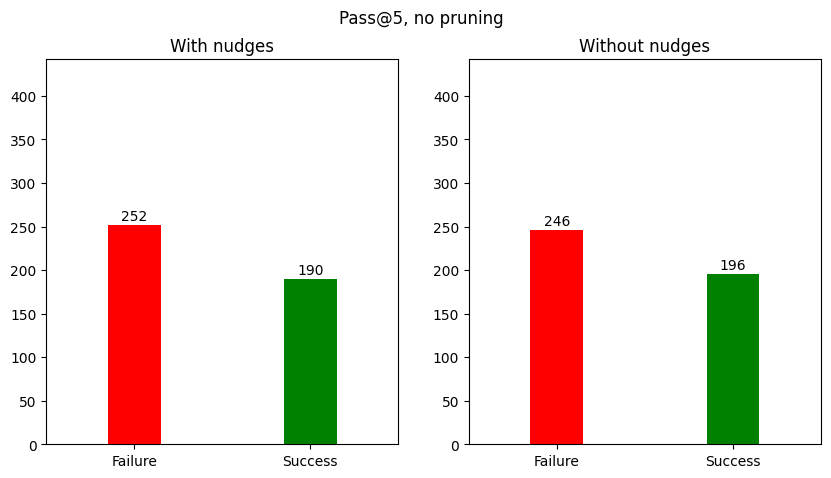

In [238]:
pass_k_figure, pass_k_ax = plt.subplots(1, 2, figsize=(10, 5))

x = [1, 2]
y_with_nudge = [len(with_nudges["pass_k"][0]), sum([len(with_nudges["pass_k"][x]) for x in [1, 2, 3, 4, 5]])]
y_without_nudge = [len(without_nudges["pass_k"][0]), sum([len(without_nudges["pass_k"][x]) for x in [1, 2, 3, 4, 5]])]

pass_k_ax[0].bar(x, y_with_nudge, color=['red', 'green'], width=0.3)
pass_k_ax[1].bar(x, y_without_nudge, color=['red', 'green'], width=0.3)

pass_k_ax[0].set_xticks(x, ['Failure', 'Success'])
pass_k_ax[1].set_xticks(x, ['Failure', 'Success'])

pass_k_ax[0].set_title('With nudges')
pass_k_ax[1].set_title('Without nudges')

pass_k_ax[0].text(1, y_with_nudge[0] + 10, str(y_with_nudge[0]), ha='center', va='center')
pass_k_ax[0].text(2, y_with_nudge[1] + 10, str(y_with_nudge[1]), ha='center', va='center')

pass_k_ax[1].text(1, y_without_nudge[0] + 10, str(y_without_nudge[0]), ha='center', va='center')
pass_k_ax[1].text(2, y_without_nudge[1] + 10, str(y_without_nudge[1]), ha='center', va='center')

pass_k_ax[0].set_ylim(0, 442)
pass_k_ax[1].set_ylim(0, 442)

pass_k_ax[0].set_xlim(0.5, 2.5)
pass_k_ax[1].set_xlim(0.5, 2.5)

pass_k_figure.suptitle('Pass@5, no pruning')
plt.savefig('pass_k_no_pruning.png')
plt.show()

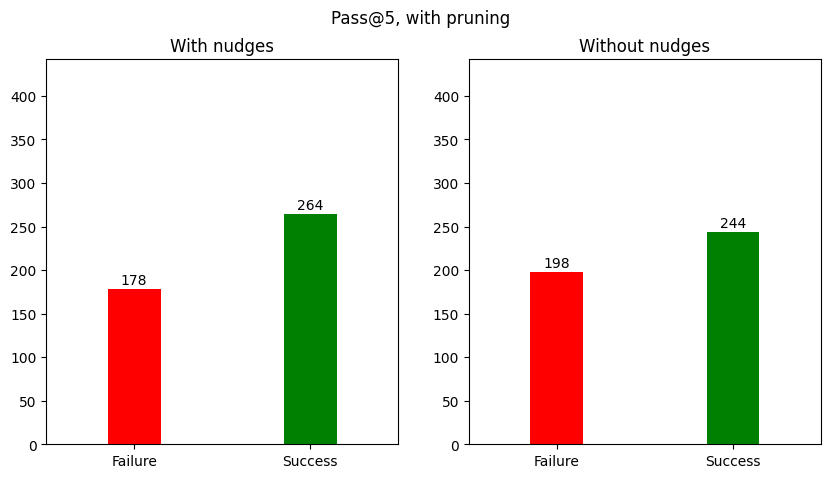

In [239]:
pass_k_prune_figure, pass_k_prune_ax = plt.subplots(1, 2, figsize=(10, 5))

x = [1, 2]
y_with_nudge = [min(len(with_nudges["pass_k"][0]), len(with_nudges["pass_k_with_prune"][0])), sum([len(with_nudges["pass_k_with_prune"][x]) + len(with_nudges["pass_k"][x]) for x in [1, 2, 3, 4, 5]])]
y_without_nudge = [min(len(without_nudges["pass_k"][0]), len(without_nudges["pass_k_with_prune"][0])), sum([len(without_nudges["pass_k_with_prune"][x]) + len(without_nudges["pass_k"][x]) for x in [1, 2, 3, 4, 5]])]

pass_k_prune_ax[0].bar(x, y_with_nudge, color=['red', 'green'], width=0.3)
pass_k_prune_ax[1].bar(x, y_without_nudge, color=['red', 'green'], width=0.3)

pass_k_prune_ax[0].set_xticks(x, ['Failure', 'Success'])
pass_k_prune_ax[1].set_xticks(x, ['Failure', 'Success'])

pass_k_prune_ax[0].set_title('With nudges')
pass_k_prune_ax[1].set_title('Without nudges')

pass_k_prune_ax[0].text(1, y_with_nudge[0] + 10, str(y_with_nudge[0]), ha='center', va='center')
pass_k_prune_ax[0].text(2, y_with_nudge[1] + 10, str(y_with_nudge[1]), ha='center', va='center')

pass_k_prune_ax[1].text(1, y_without_nudge[0] + 10, str(y_without_nudge[0]), ha='center', va='center')
pass_k_prune_ax[1].text(2, y_without_nudge[1] + 10, str(y_without_nudge[1]), ha='center', va='center')

pass_k_prune_ax[0].set_ylim(0, 442)
pass_k_prune_ax[1].set_ylim(0, 442)

pass_k_prune_ax[0].set_xlim(0.5, 2.5)
pass_k_prune_ax[1].set_xlim(0.5, 2.5)

pass_k_prune_figure.suptitle('Pass@5, with pruning')
plt.savefig('pass_k_prune.png')
plt.show()

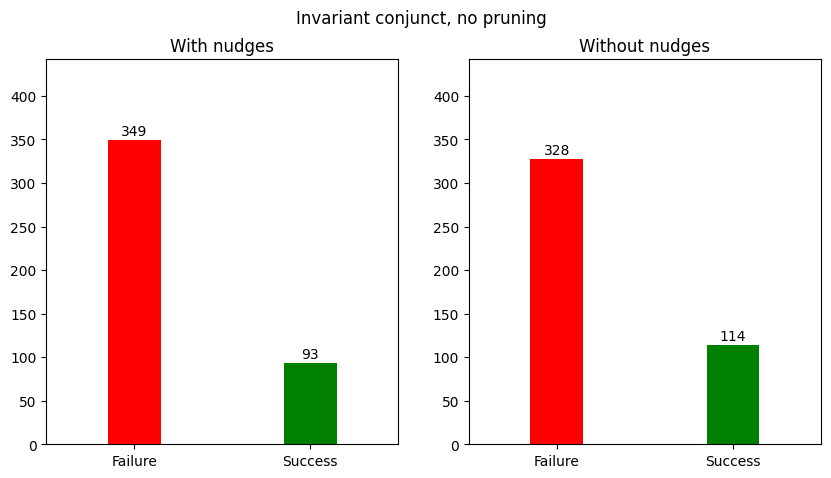

In [240]:
pass_k_figure, pass_k_ax = plt.subplots(1, 2, figsize=(10, 5))

x = [1, 2]
y_with_nudge = [len(with_nudges["conjunct_without_pruning"]["failure"]), len(with_nudges["conjunct_without_pruning"]["success"])]
y_without_nudge = [len(without_nudges["conjunct_without_pruning"]["failure"]), len(without_nudges["conjunct_without_pruning"]["success"])]

pass_k_ax[0].bar(x, y_with_nudge, color=['red', 'green'], width=0.3)
pass_k_ax[1].bar(x, y_without_nudge, color=['red', 'green'], width=0.3)

pass_k_ax[0].set_xticks(x, ['Failure', 'Success'])
pass_k_ax[1].set_xticks(x, ['Failure', 'Success'])

pass_k_ax[0].set_title('With nudges')
pass_k_ax[1].set_title('Without nudges')

pass_k_ax[0].text(1, y_with_nudge[0] + 10, str(y_with_nudge[0]), ha='center', va='center')
pass_k_ax[0].text(2, y_with_nudge[1] + 10, str(y_with_nudge[1]), ha='center', va='center')

pass_k_ax[1].text(1, y_without_nudge[0] + 10, str(y_without_nudge[0]), ha='center', va='center')
pass_k_ax[1].text(2, y_without_nudge[1] + 10, str(y_without_nudge[1]), ha='center', va='center')

pass_k_ax[0].set_ylim(0, 442)
pass_k_ax[1].set_ylim(0, 442)

pass_k_ax[0].set_xlim(0.5, 2.5)
pass_k_ax[1].set_xlim(0.5, 2.5)

pass_k_figure.suptitle('Invariant conjunct, no pruning')
plt.savefig('inv_conjunct_no_pruning.png')
plt.show()

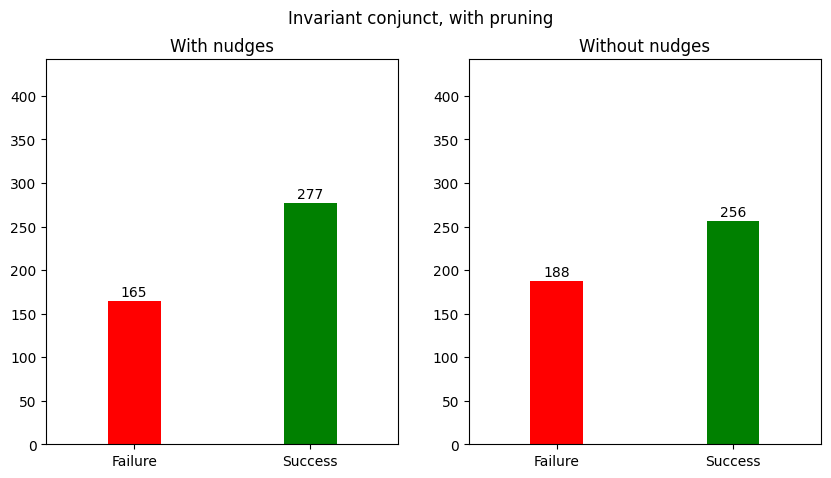

In [241]:
pass_k_figure, pass_k_ax = plt.subplots(1, 2, figsize=(10, 5))

x = [1, 2]
y_with_nudge = [len(with_nudges["conjunct_with_pruning"]["failure"]), len(with_nudges["conjunct_with_pruning"]["success"])]
y_without_nudge = [len(without_nudges["conjunct_with_pruning"]["failure"]), len(without_nudges["conjunct_with_pruning"]["success"])]

pass_k_ax[0].bar(x, y_with_nudge, color=['red', 'green'], width=0.3)
pass_k_ax[1].bar(x, y_without_nudge, color=['red', 'green'], width=0.3)

pass_k_ax[0].set_xticks(x, ['Failure', 'Success'])
pass_k_ax[1].set_xticks(x, ['Failure', 'Success'])

pass_k_ax[0].set_title('With nudges')
pass_k_ax[1].set_title('Without nudges')

pass_k_ax[0].text(1, y_with_nudge[0] + 10, str(y_with_nudge[0]), ha='center', va='center')
pass_k_ax[0].text(2, y_with_nudge[1] + 10, str(y_with_nudge[1]), ha='center', va='center')

pass_k_ax[1].text(1, y_without_nudge[0] + 10, str(y_without_nudge[0]), ha='center', va='center')
pass_k_ax[1].text(2, y_without_nudge[1] + 10, str(y_without_nudge[1]), ha='center', va='center')

pass_k_ax[0].set_ylim(0, 442)
pass_k_ax[1].set_ylim(0, 442)

pass_k_ax[0].set_xlim(0.5, 2.5)
pass_k_ax[1].set_xlim(0.5, 2.5)

pass_k_figure.suptitle('Invariant conjunct, with pruning')
plt.savefig('inv_conjunct_with_pruning.png')
plt.show()

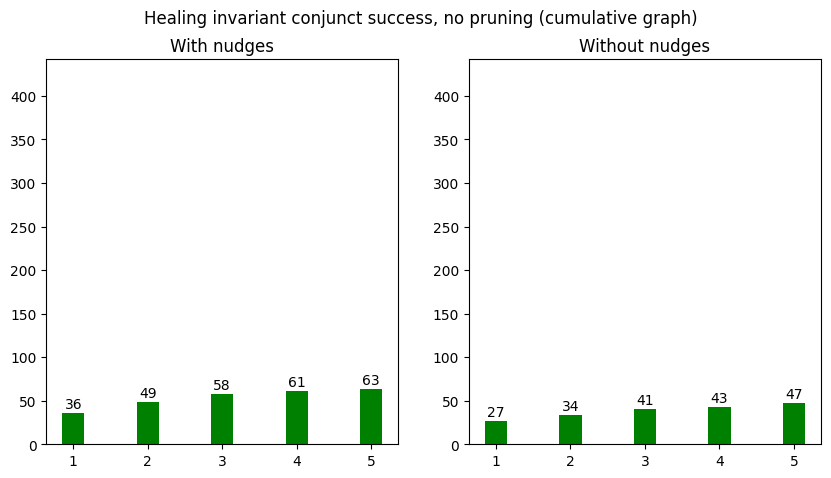

In [242]:
pass_k_figure, pass_k_ax = plt.subplots(1, 2, figsize=(10, 5))

x = [1, 2, 3, 4, 5]
y_with_nudge = [sum([len(with_nudges["healing_without_pruning"][y]) for y in range(1, x+1)]) for x in range(1, 6)]
y_without_nudge = [sum([len(without_nudges["healing_without_pruning"][y]) for y in range(1, x+1)]) for x in range(1, 6)]

pass_k_ax[0].bar(x, y_with_nudge, color=['green', 'green', 'green', 'green', 'green'], width=0.3)
pass_k_ax[1].bar(x, y_without_nudge, color=['green', 'green', 'green', 'green', 'green'], width=0.3)

pass_k_ax[0].set_xticks(x, range(1, 6))
pass_k_ax[1].set_xticks(x, range(1, 6))

pass_k_ax[0].set_title('With nudges')
pass_k_ax[1].set_title('Without nudges')

for i in y_with_nudge:
    pass_k_ax[0].text(x[y_with_nudge.index(i)], i + 10, str(i), ha='center', va='center')

for i in y_without_nudge:
    pass_k_ax[1].text(x[y_without_nudge.index(i)], i + 10, str(i), ha='center', va='center')

pass_k_ax[0].set_ylim(0, 442)
pass_k_ax[1].set_ylim(0, 442)

pass_k_figure.suptitle('Healing invariant conjunct success, no pruning (cumulative graph)')
plt.savefig('healing_invariant_conjunct_cumulative.png')
plt.show()

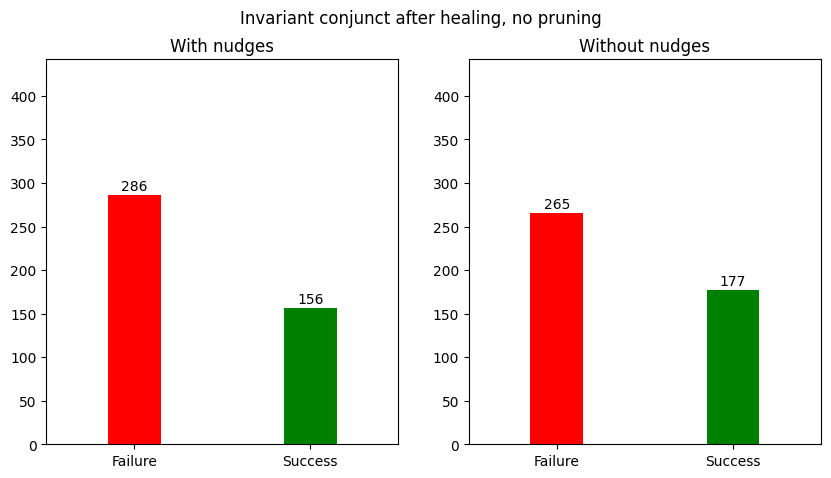

In [243]:
pass_k_figure, pass_k_ax = plt.subplots(1, 2, figsize=(10, 5))

x = [1, 2]
healing_with_nudge = sum([len(with_nudges["healing_without_pruning"][y]) for y in range(1, 6)])
y_with_nudge = [len(with_nudges["conjunct_without_pruning"]["failure"]) - healing_with_nudge, len(with_nudges["conjunct_without_pruning"]["success"]) + healing_with_nudge]
healing_without_nudge = sum([len(with_nudges["healing_without_pruning"][y]) for y in range(1, 6)])
y_without_nudge = [len(without_nudges["conjunct_without_pruning"]["failure"]) - healing_without_nudge, len(without_nudges["conjunct_without_pruning"]["success"]) + healing_without_nudge]

pass_k_ax[0].bar(x, y_with_nudge, color=['red', 'green'], width=0.3)
pass_k_ax[1].bar(x, y_without_nudge, color=['red', 'green'], width=0.3)

pass_k_ax[0].set_xticks(x, ['Failure', 'Success'])
pass_k_ax[1].set_xticks(x, ['Failure', 'Success'])

pass_k_ax[0].set_title('With nudges')
pass_k_ax[1].set_title('Without nudges')

pass_k_ax[0].text(1, y_with_nudge[0] + 10, str(y_with_nudge[0]), ha='center', va='center')
pass_k_ax[0].text(2, y_with_nudge[1] + 10, str(y_with_nudge[1]), ha='center', va='center')

pass_k_ax[1].text(1, y_without_nudge[0] + 10, str(y_without_nudge[0]), ha='center', va='center')
pass_k_ax[1].text(2, y_without_nudge[1] + 10, str(y_without_nudge[1]), ha='center', va='center')

pass_k_ax[0].set_ylim(0, 442)
pass_k_ax[1].set_ylim(0, 442)

pass_k_ax[0].set_xlim(0.5, 2.5)
pass_k_ax[1].set_xlim(0.5, 2.5)

pass_k_figure.suptitle('Invariant conjunct after healing, no pruning')
plt.savefig('healing_invariant_conjunct_no_pruning.png')
plt.show()

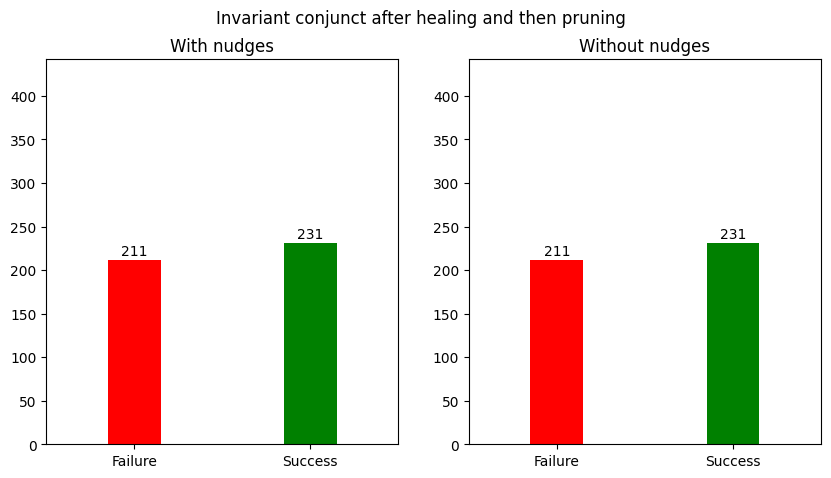

In [245]:
pass_k_figure, pass_k_ax = plt.subplots(1, 2, figsize=(10, 5))

x = [1, 2]
healing_pruning_with_nudge = len(with_nudges["healing_with_pruning"]["success"])
y_with_nudge = [len(with_nudges["healing_with_pruning"]["failure"]), len(with_nudges["conjunct_without_pruning"]["success"]) + healing_pruning_with_nudge]
healing_pruning_without_nudge = len(without_nudges["healing_with_pruning"]["success"])
y_without_nudge = [len(without_nudges["healing_with_pruning"]["failure"]), len(without_nudges["conjunct_without_pruning"]["success"]) + healing_pruning_without_nudge]

pass_k_ax[0].bar(x, y_with_nudge, color=['red', 'green'], width=0.3)
pass_k_ax[1].bar(x, y_without_nudge, color=['red', 'green'], width=0.3)

pass_k_ax[0].set_xticks(x, ['Failure', 'Success'])
pass_k_ax[1].set_xticks(x, ['Failure', 'Success'])

pass_k_ax[0].set_title('With nudges')
pass_k_ax[1].set_title('Without nudges')

pass_k_ax[0].text(1, y_with_nudge[0] + 10, str(y_with_nudge[0]), ha='center', va='center')
pass_k_ax[0].text(2, y_with_nudge[1] + 10, str(y_with_nudge[1]), ha='center', va='center')

pass_k_ax[1].text(1, y_without_nudge[0] + 10, str(y_without_nudge[0]), ha='center', va='center')
pass_k_ax[1].text(2, y_without_nudge[1] + 10, str(y_without_nudge[1]), ha='center', va='center')

pass_k_ax[0].set_ylim(0, 442)
pass_k_ax[1].set_ylim(0, 442)

pass_k_ax[0].set_xlim(0.5, 2.5)
pass_k_ax[1].set_xlim(0.5, 2.5)

pass_k_figure.suptitle('Invariant conjunct after healing and then pruning')
plt.savefig('healing_invariant_conjunct_with_pruning.png')
plt.show()

In [3]:
with_nudges_combined_success_files = []
with_nudges_combined_failure_files = []
for b in with_nudges_log:
    if "checker_output" in b.keys():
        if b["checker_output"]:
            with_nudges_combined_success_files.append(b["file"])
        else:
            with_nudges_combined_failure_files.append(b["file"])

In [20]:
without_nudges_combined_success_files = []
without_nudges_combined_failure_files = []
for b in without_nudges_log:
    if "checker_output" in b.keys():
        if b["checker_output"]:
            without_nudges_combined_success_files.append(b["file"])
        else:
            without_nudges_combined_failure_files.append(b["file"])

In [4]:
with_nudges_combined_and_pruned_success_files = []
with_nudges_combined_and_pruned_failure_files = []
for b in with_nudges_log:
    if "checker_output_after_combine_and_prune" in b.keys():
        if b["checker_output_after_combine_and_prune"]:
            with_nudges_combined_and_pruned_success_files.append(b["file"])
        else:
            with_nudges_combined_and_pruned_failure_files.append(b["file"])

In [89]:
without_nudges_combined_and_pruned_success_files = []
without_nudges_combined_and_pruned_failure_files = []
for b in without_nudges_log:
    if "checker_output_after_combine_and_prune" in b.keys():
        if b["checker_output_after_combine_and_prune"]:
            without_nudges_combined_and_pruned_success_files.append(b["file"])
        else:
            without_nudges_combined_and_pruned_failure_files.append(b["file"])

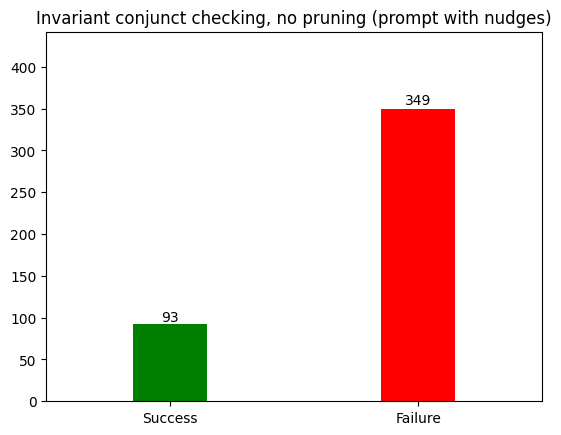

In [99]:
x = [1, 2]
y = [len(with_nudges_combined_success_files), len(with_nudges_combined_failure_files)]
fig, ax = plt.subplots()
plt.size = (10, 12)
plt.bar(x, y, color=['green', 'red'], width=0.3)
plt.xticks(x, ['Success', 'Failure'])
ax.text(1, 100, str(len(with_nudges_combined_success_files)), ha='center', va='center')
ax.text(2, 360, str(len(with_nudges_combined_failure_files)), ha='center', va='center')
plt.xlim(0.5, 2.5)
plt.ylim(0, 442)
plt.title('Invariant conjunct checking, no pruning (prompt with nudges)')
plt.show()

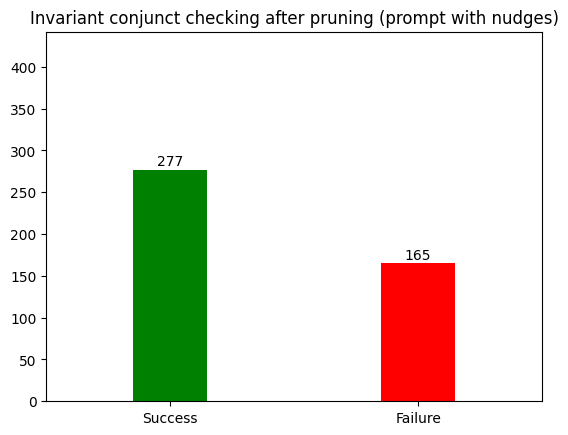

In [75]:
x = [1, 2]
y = [len(with_nudges_combined_success_files) + len(with_nudges_combined_and_pruned_success_files), len(with_nudges_combined_and_pruned_failure_files)]
fig, ax = plt.subplots()
plt.size = (10, 12)
plt.bar(x, y, color=['green', 'red'], width=0.3)
plt.xticks(x, ['Success', 'Failure'])
ax.text(1, len(with_nudges_combined_and_pruned_success_files) + len(with_nudges_combined_success_files) + 10, str(len(with_nudges_combined_and_pruned_success_files) + len(with_nudges_combined_success_files)), 
        ha='center', va='center')
ax.text(2, 175, str(len(with_nudges_combined_and_pruned_failure_files)), ha='center', va='center')
plt.xlim(0.5, 2.5)
plt.ylim(0, 442)
plt.title('Invariant conjunct checking after pruning (prompt with nudges)')
plt.show()

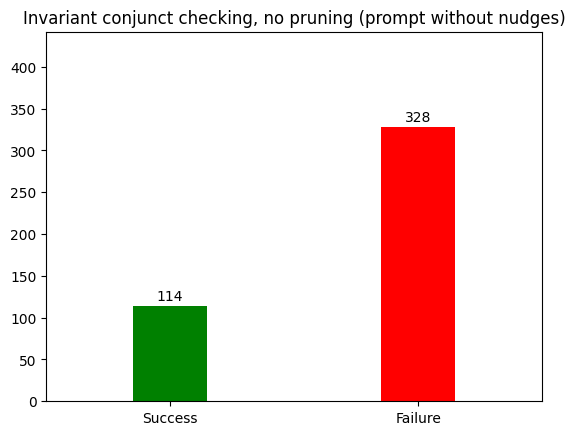

In [100]:
x = [1, 2]
y = [len(without_nudges_combined_success_files), len(without_nudges_combined_failure_files)]
fig, ax = plt.subplots()
plt.size = (10, 10)
plt.bar(x, y, color=['green', 'red'], width=0.3)
plt.xticks(x, ['Success', 'Failure'])
ax.text(1, 125, str(len(without_nudges_combined_success_files)), ha='center', va='center')
ax.text(2, 340, str(len(without_nudges_combined_failure_files)), ha='center', va='center')
plt.xlim(0.5, 2.5)
plt.ylim(0, 442)
plt.title('Invariant conjunct checking, no pruning (prompt without nudges)')
plt.show()

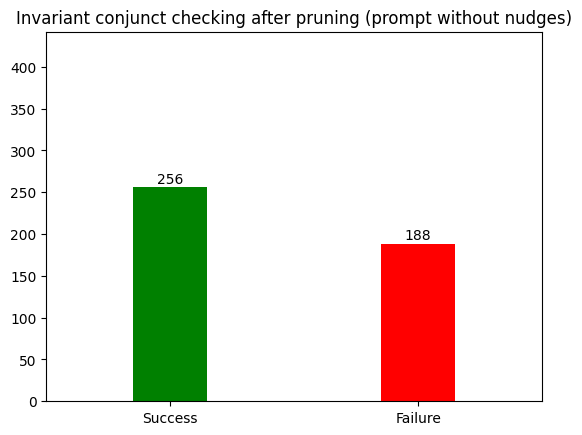

In [91]:
x = [1, 2]
y = [len(without_nudges_combined_success_files) + len(without_nudges_combined_and_pruned_success_files), len(without_nudges_combined_and_pruned_failure_files)]
fig, ax = plt.subplots()
plt.size = (10, 12)
plt.bar(x, y, color=['green', 'red'], width=0.3)
plt.xticks(x, ['Success', 'Failure'])
ax.text(1, y[0] + 10, str(y[0]), 
        ha='center', va='center')
ax.text(2, y[1] + 10, str(y[1]), ha='center', va='center')
plt.xlim(0.5, 2.5)
plt.ylim(0, 442)
plt.title('Invariant conjunct checking after pruning (prompt without nudges)')
plt.show()

In [43]:
without_nudges_pass_k_files = { 0: [], 1: [], 2: [], 3: [], 4: [], 5: [] }
for b in without_nudges_log:
    if "completions" in b.keys():
        pass_k = sum([x["success"] for x in b["completions"]])
        without_nudges_pass_k_files[pass_k].append(b["file"])

In [92]:
without_nudges_pass_k_prune_files = { 0: [], 1: [], 2: [], 3: [], 4: [], 5: [] }
for b in without_nudges_log:
    if "completions" in b.keys():
        pass_k_prune = sum([(x["success_after_prune"] if "success_after_prune" in x.keys() else 0) for x in b["completions"]])
        without_nudges_pass_k_prune_files[pass_k_prune].append(b["file"])

In [93]:
with_nudges_pass_k_prune_files = { 0: [], 1: [], 2: [], 3: [], 4: [], 5: [] }
for b in with_nudges_log:
    if "completions" in b.keys():
        pass_k_prune = sum([(x["success_after_prune"] if "success_after_prune" in x.keys() else 0) for x in b["completions"]])
        with_nudges_pass_k_prune_files[pass_k_prune].append(b["file"])

In [47]:
with_nudges_pass_k_files = { 0: [], 1: [], 2: [], 3: [], 4: [], 5: [] }
for b in with_nudges_log:
    if "completions" in b.keys():
        pass_k = sum([x["success"] for x in b["completions"]])
        with_nudges_pass_k_files[pass_k].append(b["file"])

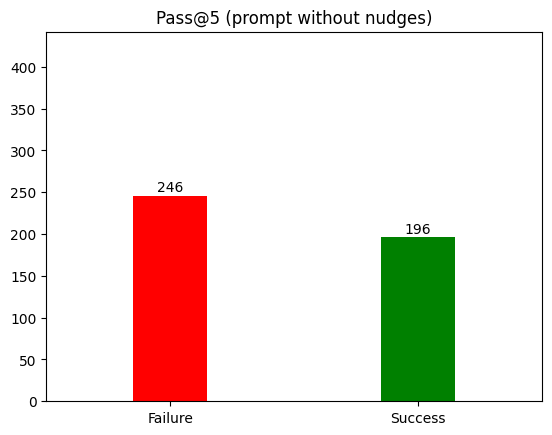

In [95]:
x = [1, 2]
y = [len(without_nudges_pass_k_files[0]), sum([len(x) for x in [without_nudges_pass_k_files[z] for z in [1, 2, 3, 4, 5]]])]
fig, ax = plt.subplots()
plt.size = (10, 10)
plt.bar(x, y, color=['red', 'green'], width=0.3)
plt.xticks(x, ['Failure', 'Success'])
ax.text(1, y[0] + 10, str(y[0]), ha='center', va='center')
ax.text(2, y[1] + 10, str(y[1]), ha='center', va='center')
plt.xlim(0.5, 2.5)
plt.ylim(0, 442)
plt.title('Pass@5 (prompt without nudges)')
plt.show()

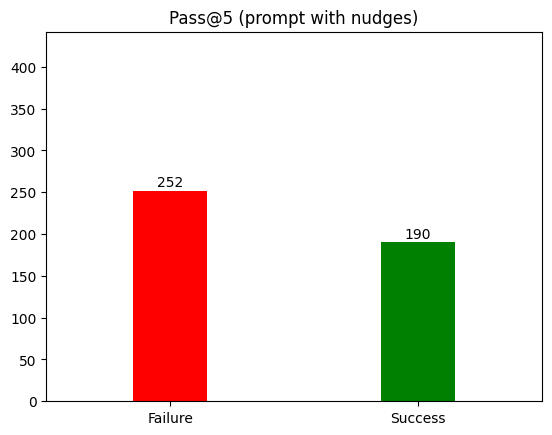

In [94]:
x = [1, 2]
y = [len(with_nudges_pass_k_files[0]), sum([len(x) for x in [with_nudges_pass_k_files[z] for z in [1, 2, 3, 4, 5]]])]
fig, ax = plt.subplots()
plt.size = (10, 10)
plt.bar(x, y, color=['red', 'green'], width=0.3)
plt.xticks(x, ['Failure', 'Success'])
ax.text(1, y[0] + 10, str(y[0]), ha='center', va='center')
ax.text(2, y[1] + 10, str(y[1]), ha='center', va='center')
plt.xlim(0.5, 2.5)
plt.ylim(0, 442)
plt.title('Pass@5 (prompt with nudges)')
plt.show()

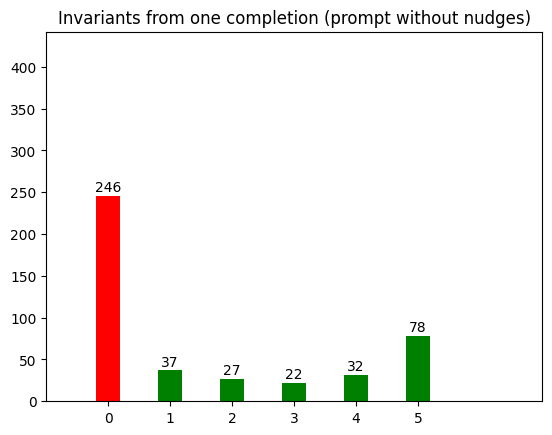

In [81]:
fig, ax = plt.subplots()
plt.size = (10, 10)
plt.bar(without_nudges_pass_k_files.keys(), [len(x) for x in without_nudges_pass_k_files.values()], color=['red', 'green', 'green', 'green', 'green', 'green'], width=0.4)
plt.xticks([0, 1, 2, 3, 4, 5])
ax.text(0, len(without_nudges_pass_k_files[0]) + 10, str(len(without_nudges_pass_k_files[0])), ha='center', va='center')
ax.text(1, len(without_nudges_pass_k_files[1]) + 10, str(len(without_nudges_pass_k_files[1])), ha='center', va='center')
ax.text(2, len(without_nudges_pass_k_files[2]) + 10, str(len(without_nudges_pass_k_files[2])), ha='center', va='center')
ax.text(3, len(without_nudges_pass_k_files[3]) + 10, str(len(without_nudges_pass_k_files[3])), ha='center', va='center')
ax.text(4, len(without_nudges_pass_k_files[4]) + 10, str(len(without_nudges_pass_k_files[4])), ha='center', va='center')
ax.text(5, len(without_nudges_pass_k_files[5]) + 10, str(len(without_nudges_pass_k_files[5])), ha='center', va='center')
plt.xlim(-1, 7)
plt.ylim(0, 442)
plt.title('Invariants from one completion (prompt without nudges)')
plt.show()

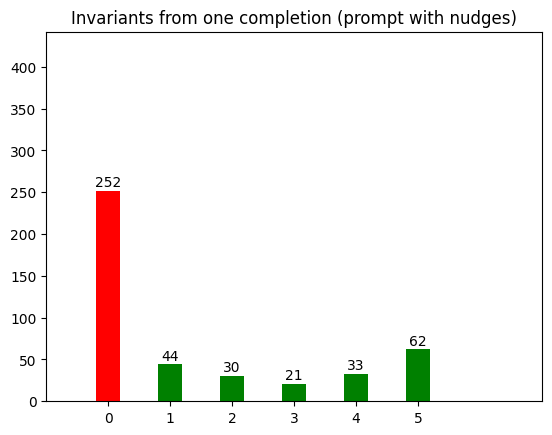

In [80]:
fig, ax = plt.subplots()
plt.size = (10, 10)
plt.bar(with_nudges_pass_k_files.keys(), [len(x) for x in with_nudges_pass_k_files.values()], color=['red', 'green', 'green', 'green', 'green', 'green'], width=0.4)
plt.xticks([0, 1, 2, 3, 4, 5])
ax.text(0, len(with_nudges_pass_k_files[0]) + 10, str(len(with_nudges_pass_k_files[0])), ha='center', va='center')
ax.text(1, len(with_nudges_pass_k_files[1]) + 10, str(len(with_nudges_pass_k_files[1])), ha='center', va='center')
ax.text(2, len(with_nudges_pass_k_files[2]) + 10, str(len(with_nudges_pass_k_files[2])), ha='center', va='center')
ax.text(3, len(with_nudges_pass_k_files[3]) + 10, str(len(with_nudges_pass_k_files[3])), ha='center', va='center')
ax.text(4, len(with_nudges_pass_k_files[4]) + 10, str(len(with_nudges_pass_k_files[4])), ha='center', va='center')
ax.text(5, len(with_nudges_pass_k_files[5]) + 10, str(len(with_nudges_pass_k_files[5])), ha='center', va='center')
plt.xlim(-1, 7)
plt.ylim(0, 442)
plt.title('Invariants from one completion (prompt with nudges)')
plt.show()